Imports

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

trials = pd.read_csv('https://raw.githubusercontent.com/Dpf050/Programming-Project/main/DataSets/trials.csv')

Dataframe Setup

In [145]:
# Datetime convert
trials['start_date'] = pd.to_datetime(trials.start_date)
trials['end_date'] = pd.to_datetime(trials.end_date)

#Labeling data for plotting comparison
trials['pt_label'] = 'EU'
trials.loc[trials.country == 'Portugal', 'pt_label'] = 'PT'

trials_EU = trials[trials.pt_label == 'EU'].copy()
trials_PT = trials[trials.pt_label == 'PT'].copy()

Number of Trials by Country

C:\Users\Diogo\AppData\Local\Temp\ipykernel_22472\3693649002.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(europe_map.centroid.x, europe_map.centroid.y, europe_map['country']):


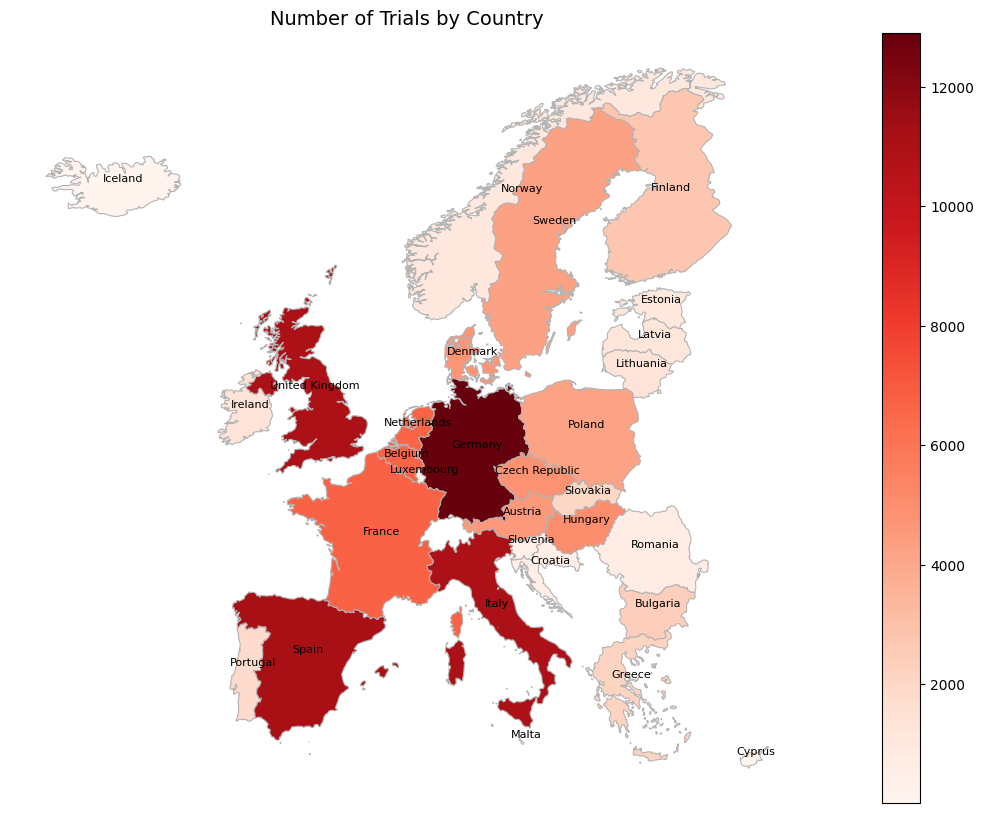

In [408]:
#Getting data ready
geo = pd.DataFrame()
geo= trials.country.value_counts().to_frame().reset_index()
geo.columns = ['country', 'count']


#Getting Europe map
europe = gpd.read_file('../DataSets/europe.geojson')[['NAME', 'geometry']]

#Are all my countries with the same name in the map df?
europe_countries= list(europe.NAME.values)
my_countries = list(geo.country.values)
countries_in_common = set(my_countries)-set(europe_countries)

# Need to change  - {'Czechia', 'UK'}
geo.loc[geo.country == 'Czechia', 'country'] = 'Czech Republic'
geo.loc[geo.country == 'UK', 'country'] = 'United Kingdom'

#Merging Datasets
europe_map = europe.merge(geo, left_on='NAME', right_on='country', how='left')

#Plotting
fig, ax = plt.subplots(1, figsize=(20, 10))
graph = europe_map.plot(column='count', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.7', legend = True)
ax.axis('off')
for x, y, label in zip(europe_map.centroid.x, europe_map.centroid.y, europe_map['country']):
    if not pd.isnull(label):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center')
title = graph.set_title('Number of Trials by Country', fontsize=14)
plt.savefig(f'../Graphics/{title}.png', transparent=True, dpi=800,bbox_inches='tight')
plt.show()

In [137]:
# Uk appears in this category after Brexit + other non eu countries
trials[trials.country == 'Outside EU/EEA'].country.count()

1553

Number of Trials over the years

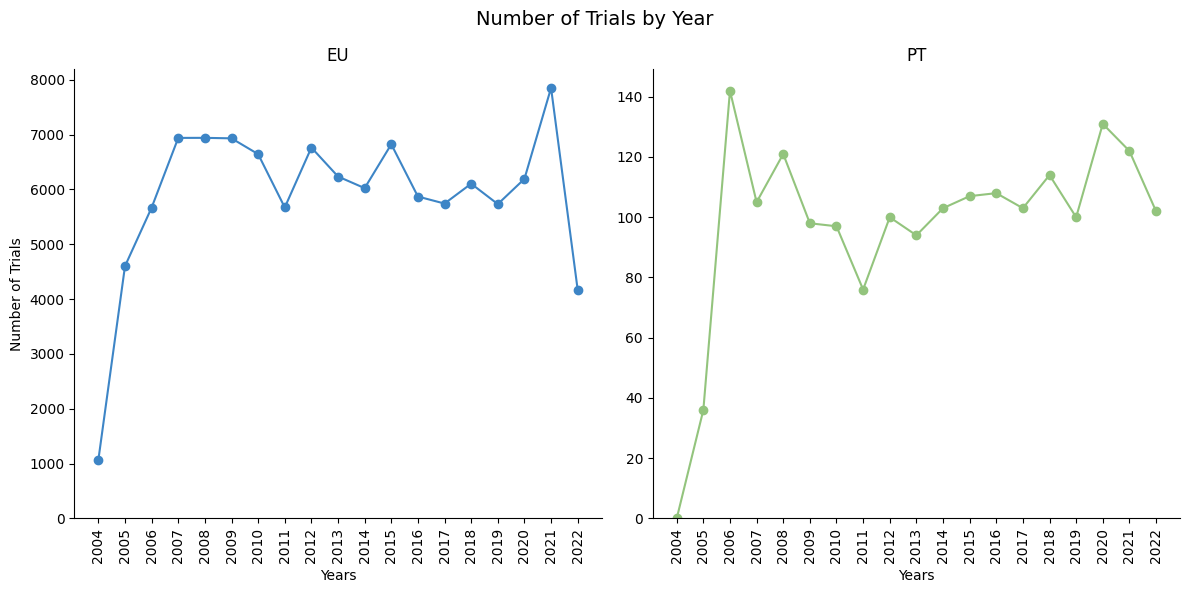

In [407]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1 - EU
trials_by_year_EU = trials_EU.start_date.dt.year.value_counts().sort_index(ascending=True)[:-1]

axs[0].plot(trials_by_year_EU.index, trials_by_year_EU.values, color='#3d85c6')
axs[0].scatter(trials_by_year_EU.index, trials_by_year_EU.values, color='#3d85c6', zorder=2)
axs[0].set_xticks(trials_by_year_EU.index)
axs[0].set_xticklabels([int(x) for x in trials_by_year_EU.index], rotation=90)
axs[0].set_ylim(bottom=0)
axs[0].set_title('EU')
axs[0].set_ylabel('Number of Trials')
axs[0].set_xlabel('Years')
sns.despine(ax=axs[0])

# Plot 2 - PT
trials_by_year_PT = trials_PT.start_date.dt.year.value_counts().sort_index(ascending=True)[:-1]
trials_by_year_PT = pd.concat([pd.Series([0], index=[2004]), trials_by_year_PT])                         #Including 2004 to keep the same time scale

axs[1].plot(trials_by_year_PT.index, trials_by_year_PT.values, color='#93c47d')
axs[1].scatter(trials_by_year_PT.index, trials_by_year_PT.values, color='#93c47d', zorder=2)
axs[1].set_xticks(trials_by_year_PT.index)
axs[1].set_xticklabels([int(x) for x in trials_by_year_PT.index], rotation=90)
axs[1].set_ylim(bottom=0)
axs[1].set_title('PT')
axs[1].set_xlabel('Years')
sns.despine(ax=axs[1])

title = 'Number of Trials by Year'
fig.suptitle(title, fontsize=14)
plt.tight_layout()
plt.savefig(f'../Graphics/{title}.png', transparent=True, dpi=800,bbox_inches='tight')
plt.show()



Public or Private Funding ?

In [184]:
funding_EU  = round(trials_EU.sponsor_type.value_counts() /len(trials_EU) * 100,2).to_frame()
funding_PT  = round(trials_PT.sponsor_type.value_counts() /len(trials_PT) * 100,2).to_frame()
combined_df = pd.concat([funding_EU, funding_PT], keys=['EU', 'PT']).reset_index()
combined_df.columns = ['Region', 'Funding Type', 'Percentage']
funding_table = pd.pivot_table(combined_df, values='Percentage', index='Funding Type', columns='Region')
funding_table

Region,EU,PT
Funding Type,,
Commercial,78.28,92.67
Non-Commercial,21.35,7.11


Therapeutic Areas % - Broad Categories

Europe

In [215]:
top5_category_EU = round(trials_EU.topic_category.value_counts() / len(trials_EU) * 100,2)[:5]

print('EU')
print('Categories MORE Studied\n')
top5_category_EU

EU
Categories MORE Studied



Diseases                                                           61.47
Not possible to specify                                            32.05
Body processes                                                      3.28
Psychiatry and Psychology                                           1.58
Analytical, Diagnostic and Therapeutic Techniques and Equipment     1.56
Name: topic_category, dtype: float64

Portugal

In [216]:
top5_category_PT = round(trials_PT.topic_category.value_counts() / len(trials_PT) * 100,2)[:5]

print('PT')
print('Categories MORE Studied\n')
top5_category_PT

PT
Categories MORE Studied



Diseases                                                           68.66
Not possible to specify                                            28.18
Body processes                                                      2.19
Psychiatry and Psychology                                           0.53
Analytical, Diagnostic and Therapeutic Techniques and Equipment     0.43
Name: topic_category, dtype: float64

Therapeutic Areas % - SUB-Categories

Europe

In [202]:
top_sub_category_EU =  round(trials_EU.topic_sub_category.value_counts() / len(trials_EU) * 100,2)
print('EU')
print('Subcategories MORE Studied\n')
print(top_sub_category_EU[:5])
print('\nSubcategories LESS Studied\n')
print(top_sub_category_EU[-5:])


EU
Subcategories MORE Studied

Not possible to specify       32.05
Cancer                        19.15
Nervous System Diseases        5.75
Cardiovascular Diseases        4.35
Respiratory Tract Diseases     3.85
Name: topic_sub_category, dtype: float64

Subcategories LESS Studied

Integumentary System Physiological Phenomena      0.01
Equipment and Supplies                            0.01
Health Services Administration                    0.00
Health Care Facilities, Manpower, and Services    0.00
Health Care Economics and Organizations           0.00
Name: topic_sub_category, dtype: float64


Portugal

In [203]:
top_sub_category_PT =  round(trials_PT.topic_sub_category.value_counts() / len(trials_PT) * 100,2)
print('PT')
print('Subcategories MORE Studied\n')
print(top_sub_category_PT[:5])
print('\nSubcategories LESS Studied\n')
print(top_sub_category_PT[-5:])


PT
Subcategories MORE Studied

Not possible to specify    28.18
Cancer                     22.35
Nervous System Diseases     7.97
Cardiovascular Diseases     6.31
Immune System Diseases      4.65
Name: topic_sub_category, dtype: float64

Subcategories LESS Studied

Bones and nerves physological processes    0.11
Behavioral Disciplines and Activities      0.05
Biological Phenomena                       0.05
Ocular Physiological Phenomena             0.05
Diagnosis                                  0.05
Name: topic_sub_category, dtype: float64


Data summary/agg functions and Color Schema

In [291]:
def get_comparison_df(variable_group, eu_df= trials_EU, pt_df = trials_PT):
    """Calculates Yes percentages for each subgroup variables for each region(Eu/Pt) and combines info into a single dataframed 

    Args:
        variable_group (string): some vars in the df are named - example_subgroup for quick selection (ex: scope,age,gender)
        eu_df (pandas DataFrame) : df with info from European countries
        pt_df (pandas DataFrame) : df with info from Portugal
        
    Returns:
        _type_: combined dataframe (pandas DataFrame))
    """    

    #Calculate Yes % for each selected column 
    def calculate_category_percentage(cols):
        category_percentage = {}
        for col in cols.columns:
            category = col.split('_')[0]
            percentage = round((cols[col] == 'Yes').sum() * 100 / len(cols), 2)
            category_percentage[category] = percentage
        return category_percentage

# Select cols from EU df and calc Yes percentages
    cols_eu = eu_df.loc[:, eu_df.columns.str.contains('_' + variable_group)]
    category_percentage_eu = calculate_category_percentage(cols_eu)

# Create Eu values df
    df_eu = pd.DataFrame(category_percentage_eu.items(), columns=[variable_group.title(), 'Percentage'])

# Select cols from PT df and calc Yes percentages
    cols_pt = pt_df.loc[:, pt_df.columns.str.contains('_' + variable_group)]
    category_percentage_pt = calculate_category_percentage(cols_pt)

# Create PT values df
    df_pt = pd.DataFrame(category_percentage_pt.items(), columns=[variable_group.title(), 'Percentage'])

# Add country label
    df_eu['Country'] = 'EU'
    df_pt['Country'] = 'PT'

# Concat df's 
    df_combined = pd.concat([df_eu, df_pt])
    df_combined.reset_index(drop=True, inplace=True)

    return df_combined


color_schema = {'EU': '#3d85c6', 'PT': '#93c47d'}

% of Trials by Phase

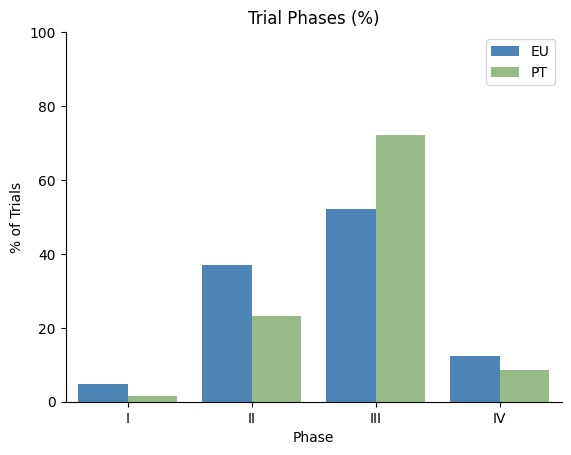

In [404]:
# Function call to get formated data
phase = get_comparison_df('phase')
phase['Phase'] = phase.Phase.replace({'1': 'I', '2':'II', '3':'III', '4':'IV'})

#Plotting
sns.barplot(data= phase, x= 'Phase', y='Percentage', hue ='Country', palette = color_schema)
title = plt.title('Trial Phases (%)')
plt.xlabel('Phase')
plt.ylabel('% of Trials')
plt.ylim(0, 100)
plt.legend(loc='upper right')
sns.despine()
plt.savefig(f'../Graphics/{title.get_text()}.png', transparent=True, dpi=800,bbox_inches='tight')
plt.show()

Age Groups Studied

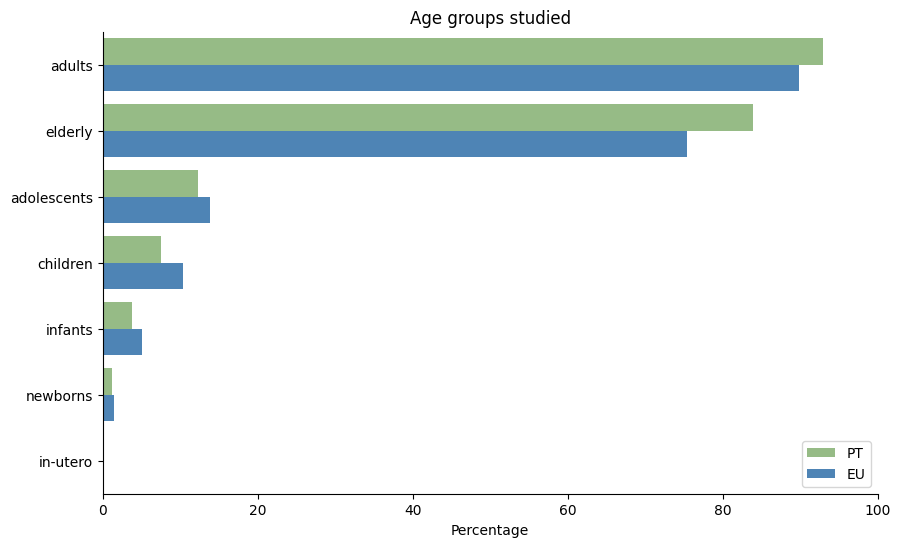

In [402]:
# Function call to get formated data
age = get_comparison_df('age').sort_values('Percentage', ascending = False)

#Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data= age, x= 'Percentage', y='Age', hue ='Country', palette = color_schema)
title = plt.title('Age groups studied')
plt.xlabel('Percentage')
plt.ylabel('')
plt.xlim(0, 100)
plt.legend(loc='lower right')
sns.despine()
plt.savefig(f'../Graphics/{title.get_text()}.png', transparent=True, dpi=800,bbox_inches='tight')
plt.show()

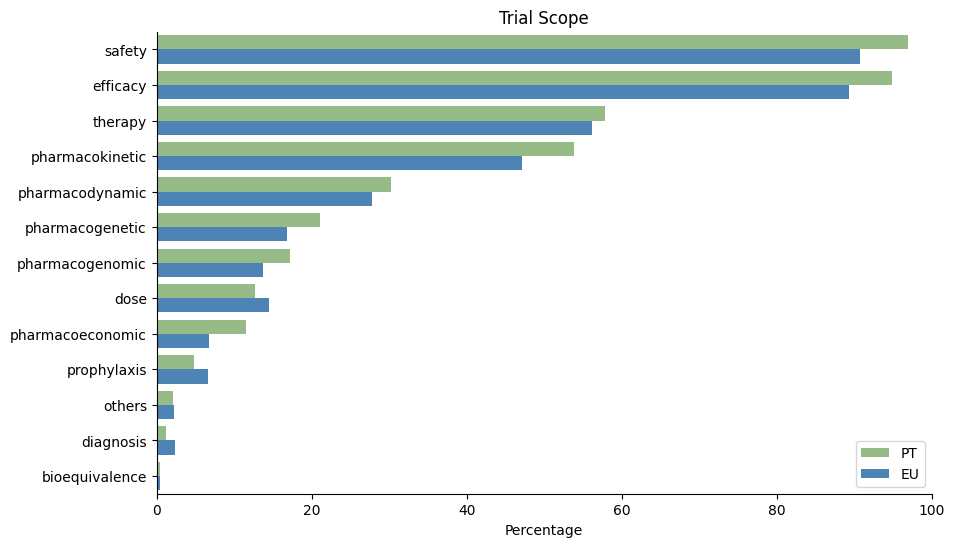

In [403]:
# Filtering scope cols with Info NOT present 
columns_to_check = trials.loc[:, trials.columns.str.contains('_scope')].columns
trials_EU_clean = trials_EU[~(trials_EU[columns_to_check] == 'Information not present in EudraCT').any(axis=1)]
trials_PT_clean = trials_PT[~(trials_PT[columns_to_check] == 'Information not present in EudraCT').any(axis=1)]

# Function call to get formated data
scope = get_comparison_df('scope',trials_EU_clean,trials_PT_clean ).sort_values(['Country', 'Percentage'], ascending=[False, False])

#Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=scope, y='Scope', x='Percentage', hue='Country', palette = color_schema)
title = plt.title('Trial Scope')
plt.xlabel('Percentage')
plt.ylabel('')
plt.xlim(0, 100)
plt.legend(loc='lower right')
sns.despine()
plt.savefig(f'../Graphics/{title.get_text()}.png', transparent=True, dpi=800,bbox_inches='tight')
plt.show() 
